<a href="https://colab.research.google.com/github/BibaswanBiswas/ChronosTrade-Stock-Market-Analysis-using-ML/blob/main/Chronos_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Week_1_code

In [ ]:
!pip install -q yfinance
#installing yfinance for dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
import itertools
warnings.filterwarnings('ignore')        #copy_pasted_from geek_for_geeks :)))))
#importing libraries

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2021-12-27,352.260010,368.000000,351.049988,366.213318,143928600
2022-01-03,342.320007,402.666656,336.666656,382.583344,458800800
2022-01-10,349.869995,371.866669,326.666656,333.333344,411751500
2022-01-17,314.633331,356.929993,313.500000,342.203339,316090500
2022-01-24,282.116669,329.230011,264.003326,301.586670,624927600
...,...,...,...,...,...
2025-12-01,455.000000,458.869995,422.119995,425.320007,342617200
2025-12-08,458.959991,463.010010,435.250000,447.450012,346426900


<Axes: xlabel='Date'>

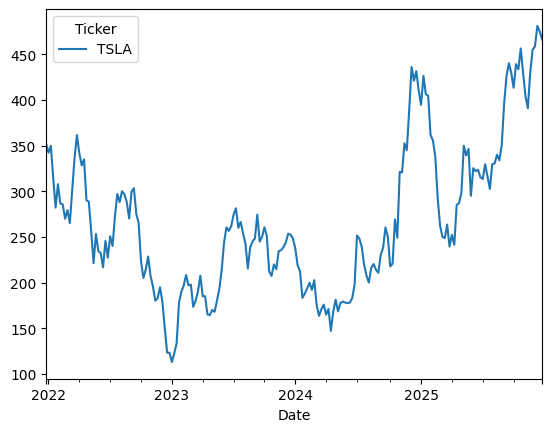

In [ ]:
df = yf.download(
    "TSLA",
    period = "4y",
    interval = "1wk",
    progress = False
)


display(df)

df.Close.plot()
#Loading the dataset

In [ ]:
#Now, we shall perform the ADF test to determine if the dataset is stationary and if not use diferencing to make it stationary
#Also, as above we are using the closing price as the variable

ts=df.Close#the dataset to be used
ts = ts.dropna()
ts_adf = ts.copy()
#we would use f fraction as training dataset and 1-f for testing.
f=0.80#fraction to be used as training data
train_size=int(len(ts)*f)
train,test=ts[:train_size],ts[train_size:]
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] > 0.05:                                              #p_value  >0.05 means we need to use differncing
    print("Series is non stationary; differencing is needed.")
else:
    print("Series is stationary; no differencing needed.")

ADF Statistic: -1.720255
p-value: 0.420708
Series is non stationary; differencing is needed.


ADF Statistic: -8.520339
p-value: 0.000000
1


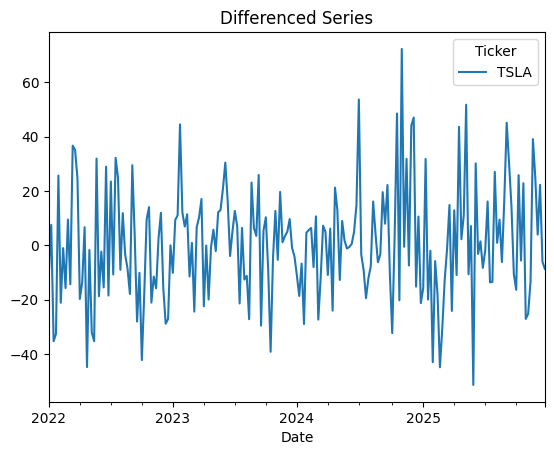

In [ ]:
#we apply differencing until p-value is <=0.05
d=0
while result[1]>0.05:
    ts_adf=ts_adf.diff()
    ts_adf = ts_adf.dropna()
    result = adfuller(ts_adf)
    d+=1
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
ts_adf.plot(title='Differenced Series')
print(d)
plt.show()

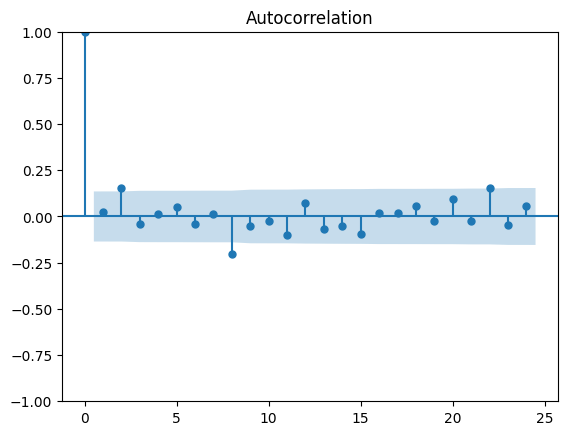

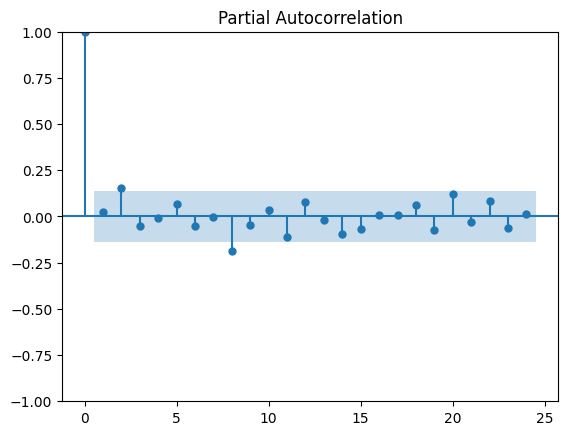

In [ ]:
#now,we plot the correlation coefficients
plot_acf(ts_adf)
plt.show()
plot_pacf(ts_adf)
plt.show()

In [ ]:
#Now, we do ARIMA model selection
p = range(0, 5)
q = range(0, 5)
pdq = list(itertools.product(p, [d], q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

Best ARIMA order: (0, 1, 2) with AIC: 1481.3910914491


In [ ]:
#next we apply this best fit model

In [ ]:
final_model = ARIMA(train, order=best_order)
results = final_model.fit()

forecast = results.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

In [ ]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
#We calculate the error metrics

Mean Absolute Error (MAE): 115.56404658263575
Mean Squared Error (MSE): 18280.028819036106
Root Mean Squared Error (RMSE): 135.20365682567947


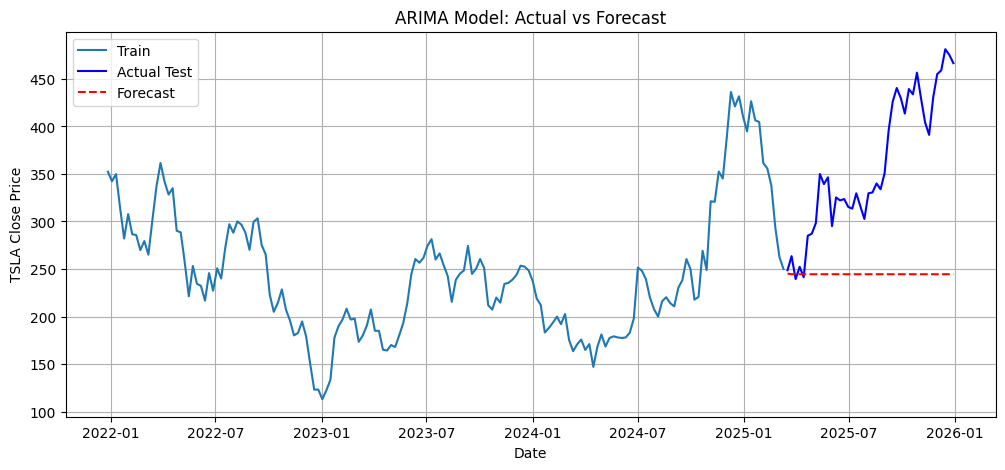

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual Test", color="blue")
plt.plot(forecast.index, forecast, label="Forecast", color="red", linestyle="--")

plt.title("ARIMA Model: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("TSLA Close Price")
plt.legend()
plt.grid(True)
plt.show()
